# COVID-19 in Ireland
__Alessandra Ravida__ - _UCDPA Certificate in Introductory Data Analytics - January 2022_

***

## Abstract
In this project I am analysing Covid-19 datasets in Ireland. Firstly I'll explore the datasets per se, looking for interesting patterns, and then I'll try to contextualise patterns and explore correlations with other data (such as infection trends in other countries, temperature and weather conditions, and the impact of some govenrnment restrictions on some specific cohorts).

***

## Python Modules

__Import all Relevant Modules__

In [4]:
#Here I import requests, numpy, pandas, matplotlib and seaborn

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***

## Import and Clean data

__Importing COVID-19 Dataset for Ireland__
[Click here for dataset source](https://covid-19.geohive.ie/datasets/d8eb52d56273413b84b0187a4e9117be/explore?showTable=true)

In [6]:
#This dataset is a csv file saved locally, I import it as Pandas DataFrame.

covid_IRL = pd.read_csv('/Users/Alessandra/Dropbox/Data Analytics/Project/UCDPA_AlessandraRavida/Data/COVID-19_HPSC_Detailed_Statistics_Profile.csv')

__Understanding the dataset__

In [7]:
#I start analysing structure of the df
covid_IRL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   X                            673 non-null    float64
 1   Y                            673 non-null    float64
 2   Date                         673 non-null    object 
 3   ConfirmedCovidCases          673 non-null    int64  
 4   TotalConfirmedCovidCases     673 non-null    int64  
 5   ConfirmedCovidDeaths         502 non-null    float64
 6   TotalCovidDeaths             673 non-null    int64  
 7   StatisticsProfileDate        673 non-null    object 
 8   CovidCasesConfirmed          671 non-null    float64
 9   HospitalisedCovidCases       671 non-null    float64
 10  RequiringICUCovidCases       671 non-null    float64
 11  HealthcareWorkersCovidCases  671 non-null    float64
 12  ClustersNotified             651 non-null    float64
 13  HospitalisedAged5   

In [8]:
#look at the first 5 rows of the dataset

covid_IRL.head()

X          Y                    Date  ConfirmedCovidCases  \
0 -7.692596  53.288234  2020/02/29 00:00:00+00                    1   
1 -7.692596  53.288234  2020/03/03 00:00:00+00                    1   
2 -7.692596  53.288234  2020/03/04 00:00:00+00                    4   
3 -7.692596  53.288234  2020/03/05 00:00:00+00                    7   
4 -7.692596  53.288234  2020/03/06 00:00:00+00                    5   

   TotalConfirmedCovidCases  ConfirmedCovidDeaths  TotalCovidDeaths  \
0                         1                   0.0                 0   
1                         2                   0.0                 0   
2                         6                   0.0                 0   
3                        13                   0.0                 0   
4                        18                   0.0                 0   

    StatisticsProfileDate  CovidCasesConfirmed  HospitalisedCovidCases  ...  \
0  2020/02/27 00:00:00+00                  NaN                     NaN  ...   
1  2020/03/01 00:00:00+00                  NaN                     NaN  ...   
2  2020/03/02 00:00:00+00                  1.0                     0.0  ...   
3  2020/03/03 00:00:00+00                  2.0                     1.0  ...   
4  2020/03/04 00:00:00+00                  5.0                     4.0  ...   

   CommunityTransmission  CloseContact  TravelAbroad  FID  \
0                      0             0             0    1   
1                      0             0             0    2   
2                      0             0             0    3   
3                      0             0             0    4   
4                      0             0             0    5   

   HospitalisedAged65to74  HospitalisedAged75to84  HospitalisedAged85up  \
0                     NaN                     NaN                   NaN   
1                     NaN                     NaN                   NaN   
2                     0.0                     0.0                   0.0   
3                     0.0                     0.0                   0.0   
4                     0.0                     0.0                   0.0   

   Aged65to74  Aged75to84  Aged85up  
0         NaN         NaN       NaN  
1         NaN         NaN       NaN  
2         0.0         0.0       0.0  
3         0.0         0.0       0.0  
4         0.0         0.0       0.0  

[5 rows x 41 columns]

In [124]:
"""
First date in dataset is 29th of Feb 2020.
I now check what's the last date.
This information will be important to slice other time-based datasets.
"""
#I select the last row of the dataframe via its index number and only the date column

covid_IRL.loc[672 , "Date"]

'2022/01/03 00:00:00+00'

__Cleaning the dataset__

In [9]:
""" 
In the first rows of the df, there are some NaN.
I believe that for the first few days they might not have 
tested all hospitalised patients for COVID hence it's more correct 
to report those values as NaN rather than 0.0, however I think that
for the purposese of my analysis, it's safe to convert NaN into 0.0.
"""

#I check in how many more instances I find NaN in the dataset

covid_IRL.isna().sum()

X                                0
Y                                0
Date                             0
ConfirmedCovidCases              0
TotalConfirmedCovidCases         0
ConfirmedCovidDeaths           171
TotalCovidDeaths                 0
StatisticsProfileDate            0
CovidCasesConfirmed              2
HospitalisedCovidCases           2
RequiringICUCovidCases           2
HealthcareWorkersCovidCases      2
ClustersNotified                22
HospitalisedAged5                2
HospitalisedAged5to14            2
HospitalisedAged15to24           2
HospitalisedAged25to34           2
HospitalisedAged35to44           2
HospitalisedAged45to54           2
HospitalisedAged55to64           2
Male                             2
Female                           2
Unknown                          2
Aged1to4                         2
Aged5to14                        2
Aged15to24                       2
Aged25to34                       2
Aged35to44                       2
Aged45to54          

In [10]:
""" 
The column with most NaN is ConfirmedCovidDeaths, 
this is due to the fact that the reporting system for 
COVID deaths has changed in the summer of 2021 from a daily
to a weekly report, hence numbers appear now only 
once a week.

Note:It might be better to analyse data on a weekly 
basis rather than on a dayly basis
"""

#replacing NaN with 0 and check if successful

covid_IRL_fill = covid_IRL.fillna(0)
covid_IRL_fill.isna().sum()

X                              0
Y                              0
Date                           0
ConfirmedCovidCases            0
TotalConfirmedCovidCases       0
ConfirmedCovidDeaths           0
TotalCovidDeaths               0
StatisticsProfileDate          0
CovidCasesConfirmed            0
HospitalisedCovidCases         0
RequiringICUCovidCases         0
HealthcareWorkersCovidCases    0
ClustersNotified               0
HospitalisedAged5              0
HospitalisedAged5to14          0
HospitalisedAged15to24         0
HospitalisedAged25to34         0
HospitalisedAged35to44         0
HospitalisedAged45to54         0
HospitalisedAged55to64         0
Male                           0
Female                         0
Unknown                        0
Aged1to4                       0
Aged5to14                      0
Aged15to24                     0
Aged25to34                     0
Aged35to44                     0
Aged45to54                     0
Aged55to64                     0
Median_Age

In [18]:
"""
I want to see how the confirmed covid deaths column looks,
i think it's misleading since all the other data is daily.

If I use this column I will manipulate all the other columns so to show 
weekly data and not daily
"""

#make a quick line plot of Confirmed covid cases vs date
sns.lineplot(data=covid_IRL_ordered, x="Date", y="ConfirmedCovidDeaths")
plt.show()

"""
I need to address the display of the x-axis to tidy up the visualisation
"""

In [31]:
"""
The display of the x axis needs to be addressed.
One problem could be that the Date column is not seen as date.
If I convert the date column into date variable Imight be able
to control the axes better.
"""

#I check the type of variables in the column Date
covid_IRL_ordered.dtypes

FID                           int64
Date                         object
ConfirmedCovidCases           int64
TotalConfirmedCovidCases      int64
ConfirmedCovidDeaths        float64
TotalCovidDeaths              int64
HospitalisedCovidCases      float64
RequiringICUCovidCases      float64
Aged1to4                    float64
Aged5to14                   float64
Aged15to24                  float64
Aged25to34                  float64
Aged35to44                  float64
Aged45to54                  float64
Aged55to64                  float64
Aged65to74                  float64
Aged75to84                  float64
Aged85up                    float64
HospitalisedAged5           float64
HospitalisedAged5to14       float64
HospitalisedAged15to24      float64
HospitalisedAged25to34      float64
HospitalisedAged35to44      float64
HospitalisedAged45to54      float64
HospitalisedAged55to64      float64
HospitalisedAged65to74      float64
HospitalisedAged75to84      float64
HospitalisedAged85up        

In [26]:
#I will convert the Date values into datetime variables
covid_IRL_clean['Date'] = pd.to_datetime(covid_IRL_clean['Date'])

#I check if the format of the Date column has changed successfully
covid_IRL_clean.dtypes

Date                        datetime64[ns, UTC]
ConfirmedCovidCases                       int64
TotalConfirmedCovidCases                  int64
ConfirmedCovidDeaths                    float64
TotalCovidDeaths                          int64
HospitalisedCovidCases                  float64
RequiringICUCovidCases                  float64
HospitalisedAged5                       float64
HospitalisedAged5to14                   float64
HospitalisedAged15to24                  float64
HospitalisedAged25to34                  float64
HospitalisedAged35to44                  float64
HospitalisedAged45to54                  float64
HospitalisedAged55to64                  float64
Male                                    float64
Female                                  float64
Unknown                                 float64
Aged1to4                                float64
Aged5to14                               float64
Aged15to24                              float64
Aged25to34                              

In [11]:
#Drop columns I am not interested in
covid_IRL_clean=covid_IRL_fill.drop(["X", "Y","StatisticsProfileDate", "CovidCasesConfirmed","HealthcareWorkersCovidCases", "ClustersNotified", "Median_Age","CommunityTransmission", "CloseContact", "TravelAbroad"], axis='columns')

#Check the columns in the new df
covid_IRL_clean.columns


Index(['Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'Male', 'Female', 'Unknown', 'Aged1to4',
       'Aged5to14', 'Aged15to24', 'Aged25to34', 'Aged35to44', 'Aged45to54',
       'Aged55to64', 'FID', 'HospitalisedAged65to74', 'HospitalisedAged75to84',
       'HospitalisedAged85up', 'Aged65to74', 'Aged75to84', 'Aged85up'],
      dtype='object')

In [12]:
#rearrange columns
covid_IRL_ordered=covid_IRL_clean[["FID","Date", "ConfirmedCovidCases", "TotalConfirmedCovidCases", "ConfirmedCovidDeaths", "TotalCovidDeaths", 'HospitalisedCovidCases', 'RequiringICUCovidCases', 'Aged1to4','Aged5to14', 'Aged15to24', 'Aged25to34', 'Aged35to44', 'Aged45to54',
       'Aged55to64','Aged65to74', 'Aged75to84', 'Aged85up','HospitalisedAged5', 'HospitalisedAged5to14','HospitalisedAged15to24', 'HospitalisedAged25to34', 'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74', 'HospitalisedAged75to84','HospitalisedAged85up', 'Male', 'Female', 'Unknown']]
covid_IRL_ordered.columns

Index(['FID', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown'],
      dtype='object')

***

## Data Exploration and Analysis

In [19]:
#I remind myself of the names of the columns
covid_IRL_ordered.columns

Index(['FID', 'Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'HospitalisedCovidCases',
       'RequiringICUCovidCases', 'Aged1to4', 'Aged5to14', 'Aged15to24',
       'Aged25to34', 'Aged35to44', 'Aged45to54', 'Aged55to64', 'Aged65to74',
       'Aged75to84', 'Aged85up', 'HospitalisedAged5', 'HospitalisedAged5to14',
       'HospitalisedAged15to24', 'HospitalisedAged25to34',
       'HospitalisedAged35to44', 'HospitalisedAged45to54',
       'HospitalisedAged55to64', 'HospitalisedAged65to74',
       'HospitalisedAged75to84', 'HospitalisedAged85up', 'Male', 'Female',
       'Unknown'],
      dtype='object')

The first thing I am going to explore is the cases by age group.
I am particularely interested in understanding the effect of the 
Goverment restrictions on schools opening/closing and if there
are any interesting observations.

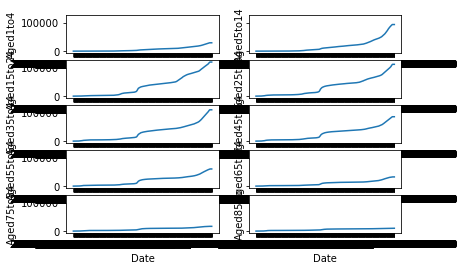

In [21]:
#set up a multiplot area 5 rows by 2 columns - share the ylabel so data can be compared more easily
fig, ax = plt.subplots(5,2, sharey=True)

#define what's to go into each plot
ax[0,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged1to4"])
ax[0,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged5to14"])
ax[1,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged15to24"])
ax[1,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged25to34"])
ax[2,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged35to44"])
ax[2,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged45to54"])
ax[3,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged55to64"])
ax[3,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged65to74"])
ax[4,0].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged75to84"])
ax[4,1].plot(covid_IRL_ordered["Date"],covid_IRL_ordered["Aged85up"])

#set labels for x and y axes
ax[0,0].set_ylabel("Aged1to4")
ax[0,1].set_ylabel("Aged5to14")
ax[1,0].set_ylabel("Aged15to24")
ax[1,1].set_ylabel("Aged25to34")
ax[2,0].set_ylabel("Aged35to44")
ax[2,1].set_ylabel("Aged45to54")
ax[3,0].set_ylabel("Aged55to64")
ax[3,1].set_ylabel("Aged65to74")
ax[4,0].set_ylabel("Aged75to84")
ax[4,1].set_ylabel("Aged85up")
ax[4,0].set_xlabel("Date")
ax[4,1].set_xlabel("Date")

plt.show()

In [ ]:
"""
However, this visualization is interesting as it's showing
asimilar trend but the 15-24 category (and slightly 5-14 
and 25-34) have a little bump in the middle
that it's definitely not there in the 35-44 category.

I'll explore this further but first I'll find a way to improve 
the display of the x axis
"""

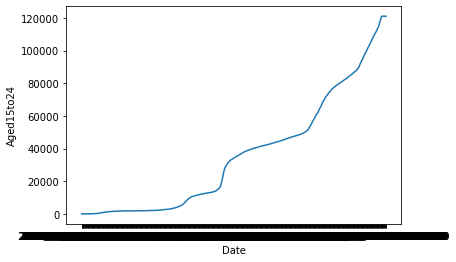

In [22]:
sns.lineplot(data=covid_IRL_ordered, x="Date",y="Aged15to24")

plt.show()